In [26]:
# importa a biblioteca pandas
import pandas as pd
# importa a biblioteca numpy
import numpy as np
from numpy import dtype
# importa o módulo pyplot, do matplotlib
from matplotlib import pyplot as plt

# configura o matplotlib para renderizar os plots no jupyter
%matplotlib inline

# configura a formatação de inteiros, adicionando um separador de milhares
class _IntArrayFormatter(pd.formats.format.GenericArrayFormatter):

    def _format_strings(self):
        formatter = self.formatter or (lambda x: '{:,}'.format(x).replace(',', '.'))
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values

pd.formats.format.IntArrayFormatter = _IntArrayFormatter

# função que formata float adicionando separador de milhares '.' e separador de decimal
#   ','
# para detalhes dos replaces, ver: 
# https://www.python.org/dev/peps/pep-0378/#main-proposal-from-nick-coghlan-originally-called-proposal-i
def format_float(f):
    
    return "{:,.2f}".format(f).replace(",", "X").replace(".", ",").replace("X", ".")

# configura a formatação de decimais, adicionando um separador de milhares
pd.set_option("display.float_format", format_float)

from ipywidgets import widgets
from IPython.display import display

# Dataset de servidores lotados na UFC

Dataset gerado a partir dos [dados de cadastro e de remuneração de servidores públicos federais](http://portaldatransparencia.gov.br/downloads/servidores.asp), de fevereiro de 2017.

* **Colunas**
  * **cargo**: DESCRICAO_CARGO em 201702_Cadastro.csv
  * **funcao**: FUNCAO em 201702_Cadastro.csv
  * **uorg_lotacao**: UORG_LOTACAO em 201702_Cadastro.csv
  * **uorg_exercicio**: UORG_EXERCICIO em 201702_Cadastro.csv
  * **jornada**: JORNADA_DE_TRABALHO em 201702_Cadastro.csv
  * **remuneracao_basica_bruta**: REMUNERAÇÃO BÁSICA BRUTA (R\$) em 201702_Remuneracao.csv
  * **remuneracao_pos_deducao**: REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R\$) em 201702_Remuneracao.csv
  * **nome**: NOME em 201702_Remuneracao.csv
  
  
Consulta por servidor: http://portaldatransparencia.gov.br/servidores/Servidor-ListaServidores.asp

## Leitura

In [13]:
ufc_dtypes = {
 'ABATE-TETO (R$)': dtype('float64'),
 'ABATE-TETO (U$)': dtype('float64'),
 'ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$)': dtype('float64'),
 'ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$)': dtype('float64'),
 'ANO': dtype('int64'),
 'ATIVIDADE': dtype('O'),
 'CLASSE_CARGO': dtype('O'),
 'DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO': dtype('O'),
 'DATA_INGRESSO_CARGOFUNCAO': dtype('O'),
 'DATA_INGRESSO_ORGAO': dtype('O'),
 'DATA_INICIO_AFASTAMENTO': dtype('O'),
 'DATA_NOMEACAO_CARGOFUNCAO': dtype('float64'),
 'DATA_TERMINO_AFASTAMENTO': dtype('O'),
 'DEMAIS DEDUÇÕES (R$)': dtype('float64'),
 'DEMAIS DEDUÇÕES (U$)': dtype('float64'),
 'DESCRICAO_CARGO-ID': dtype('int64'),
 'FUNCAO': dtype('O'),
 'FUNDO DE SAÚDE (R$)': dtype('float64'),
 'FUNDO DE SAÚDE (U$)': dtype('float64'),
 'FÉRIAS (R$)': dtype('float64'),
 'FÉRIAS (U$)': dtype('float64'),
 'GRATIFICAÇÃO NATALINA (R$)': dtype('float64'),
 'GRATIFICAÇÃO NATALINA (U$)': dtype('float64'),
 'ID_SERVIDOR_PORTAL': dtype('int64'),
 'IRRF (R$)': dtype('O'),
 'IRRF (U$)': dtype('O'),
 'Id_SERVIDOR_PORTAL': dtype('int64'),
 'JORNADA_DE_TRABALHO-ID': dtype('int64'),
 'MES': dtype('int64'),
 'NIVEL_CARGO': dtype('float64'),
 'NIVEL_FUNCAO': dtype('float64'),
 'NOME-ID': dtype('int64'),
 'OBSERVACAO-ID': dtype('int64'),
 'ORGSUP_EXERCICIO-ID': dtype('int64'),
 'ORGSUP_LOTACAO-ID': dtype('int64'),
 'ORG_EXERCICIO-ID': dtype('int64'),
 'ORG_LOTACAO-ID': dtype('int64'),
 'OUTRAS REMUNERAÇÕES EVENTUAIS (R$)': dtype('float64'),
 'OUTRAS REMUNERAÇÕES EVENTUAIS (U$)': dtype('float64'),
 'PADRAO_CARGO': dtype('O'),
 'PENSÃO MILITAR (R$)': dtype('float64'),
 'PENSÃO MILITAR (U$)': dtype('float64'),
 'PSS/RPGS (R$)': dtype('float64'),
 'PSS/RPGS (U$)': dtype('float64'),
 'REFERENCIA_CARGO': dtype('float64'),
 'REGIME_JURIDICO-ID': dtype('int64'),
 'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)': dtype('float64'),
 'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$)': dtype('float64'),
 'REMUNERAÇÃO BÁSICA BRUTA (R$)': dtype('float64'),
 'REMUNERAÇÃO BÁSICA BRUTA (U$)': dtype('float64'),
 'SITUACAO_VINCULO-ID': dtype('int64'),
 'TIPO_VINCULO': dtype('int64'),
 'TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)': dtype('float64'),
 'TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*)': dtype('float64'),
 'UORG_EXERCICIO-ID': dtype('int64'),
 'UORG_LOTACAO-ID': dtype('int64'),
 'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*)': dtype('float64'),
 'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*)': dtype('float64'),
 'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*)': dtype('float64'),
 'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*)': dtype('float64')}

date_parser = lambda mes, ano: pd.datetime.strptime("{}/{}".format(mes, ano), "%m/%Y")

# leitura de arquivo .CSV
ufc = pd.read_csv("../dataset-remuneracao-federal/dataset.csv", decimal=",", dtype=ufc_dtypes,
                  parse_dates=[['MES', 'ANO']], date_parser=date_parser)

# reconstitui as colunas normalizadas
base_path = "../dataset-remuneracao-federal/"
for fk in (col for col in ufc.columns if col.endswith("-ID")):
    
    filepath = "{}{}.csv".format(base_path, fk.split("-")[0])
    col_df = pd.read_csv(filepath)
    ufc = pd.merge(ufc, col_df)
    ufc.drop(fk, axis=1, inplace=True)

# retorna os 3 primeiros registros
ufc.head(3)

,MES_ANO,Id_SERVIDOR_PORTAL,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,NIVEL_FUNCAO,FUNCAO,ATIVIDADE,TIPO_VINCULO,...,UORG_LOTACAO,ORG_LOTACAO,ORGSUP_LOTACAO,UORG_EXERCICIO,ORG_EXERCICIO,ORGSUP_EXERCICIO,SITUACAO_VINCULO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,OBSERVACAO
0,2013-01-01,1.000.475,D,nan,411,nan,nan,NaN,NaN,2,...,DIVISAO DE ADMISSAO E MATRICULA,UNIVERSIDADE FEDERAL DO CEARA,MINISTERIO DA EDUCACAO,NaN,UNIVERSIDADE FEDERAL DO CEARA,MINISTERIO DA EDUCACAO,ATIVO PERMANENTE,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,NÃO-ESPECIFICADO
1,2014-01-01,1.002.782,D,nan,412,nan,nan,NaN,NaN,2,...,DIVISAO DE ADMISSAO E MATRICULA,UNIVERSIDADE FEDERAL DO CEARA,MINISTERIO DA EDUCACAO,NaN,UNIVERSIDADE FEDERAL DO CEARA,MINISTERIO DA EDUCACAO,ATIVO PERMANENTE,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,NÃO-ESPECIFICADO
2,2015-01-01,1.000.565,D,nan,412,nan,nan,NaN,NaN,2,...,DIVISAO DE ADMISSAO E MATRICULA,UNIVERSIDADE FEDERAL DO CEARA,MINISTERIO DA EDUCACAO,NaN,UNIVERSIDADE FEDERAL DO CEARA,MINISTERIO DA EDUCACAO,ATIVO PERMANENTE,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,NÃO-ESPECIFICADO


In [14]:
# quantidade de registros
print("Há {} registros".format(len(ufc)))

Há 342200 registros


In [24]:
def plot_remuneracao(nome):
    
    registros_do_nome = ufc[ufc.NOME == nome]
    if not len(registros_do_nome):
        
        print("Nome não encontrado: {}".format(nome))
        return
    
    _, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
        
    apenas_nao_funcao = registros_do_nome[registros_do_nome['FUNCAO'].isnull()]
    piece = apenas_nao_funcao.sort_values('MES_ANO')
    
    piece['pct_change'] = piece['REMUNERAÇÃO BÁSICA BRUTA (R$)'].pct_change()

    piece.plot(x='MES_ANO', y='pct_change', ax=ax1, ylim=(-.5, .5))
    ax1.axhline(0, linewidth=.5, c='r')
    
    piece.plot(x='MES_ANO', y='REMUNERAÇÃO BÁSICA BRUTA (R$)', ax=ax2)

<script src="https://npmcdn.com/jupyter-js-widgets@~1.2.0/dist/embed.js"></script><script type="application/vnd.jupyter-embedded-widgets">{}</script>

Nome não encontrado: GIL DE AQUINO


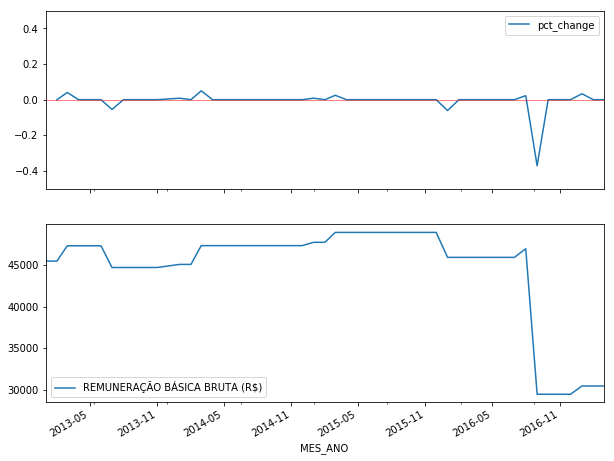

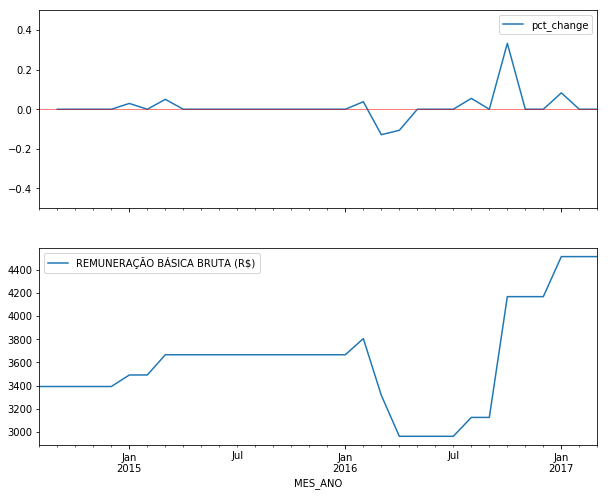

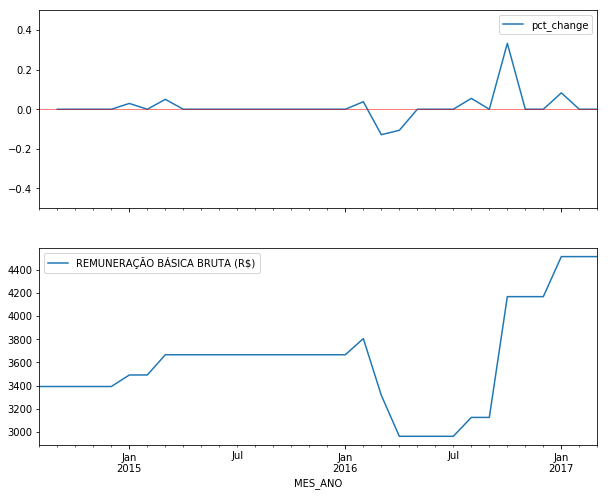

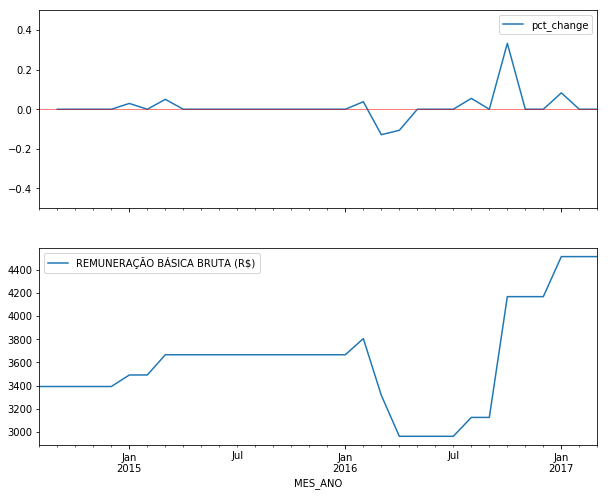

In [25]:
# https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
from ipywidgets import widgets
from IPython.display import display
nome = widgets.Text()
display(nome)

def handle_submit(sender):
    plot_remuneracao(nome.value)
    
nome.on_submit(handle_submit)

## Informações gerais sobre as colunas

In [151]:
# informações estatísticas sobre os campos numéricos
ufc.describe().T

,count,mean,std,min,25%,50%,75%,max
Id_SERVIDOR_PORTAL,"342.200,00","1.543.724,95","311.577,36","1.000.014,00","1.277.001,50","1.543.966,00","1.810.485,25","2.259.860,00"
REFERENCIA_CARGO,"0,00",nan,nan,nan,nan,nan,nan,nan
NIVEL_CARGO,"119.588,00","557,46","171,45","1,00","501,00","602,00","701,00","801,00"
NIVEL_FUNCAO,"41.260,00","7,30","59,48","1,00","1,00","2,00","4,00","1.025,00"
TIPO_VINCULO,"342.200,00","1,88","0,33","1,00","2,00","2,00","2,00","3,00"
DATA_NOMEACAO_CARGOFUNCAO,"0,00",nan,nan,nan,nan,nan,nan,nan
ID_SERVIDOR_PORTAL,"342.200,00","1.543.724,95","311.577,36","1.000.014,00","1.277.001,50","1.543.966,00","1.810.485,25","2.259.860,00"
REMUNERAÇÃO BÁSICA BRUTA (R$),"342.200,00","8.417,67","6.290,60","0,00","3.992,25","6.442,83","10.818,04","69.972,10"
REMUNERAÇÃO BÁSICA BRUTA (U$),"342.200,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
ABATE-TETO (R$),"342.200,00","-78,77","823,22","-36.596,37","0,00","0,00","0,00","0,00"


In [154]:
# informações estatísticas sobre os campos não quantitativos
ufc.describe(include = ['O']).T

,count,unique,top,freq
CLASSE_CARGO,300445,12,D,75003
PADRAO_CARGO,180857,64,416,34154
FUNCAO,41260,7,FUNCAO GRATIFICADA - IFES,21067
ATIVIDADE,41253,73,COORDENADOR DE CURSO,5464
DATA_INICIO_AFASTAMENTO,342200,747,Não informada,335904
DATA_TERMINO_AFASTAMENTO,342200,799,Não informada,336140
DATA_INGRESSO_CARGOFUNCAO,341705,2378,01/03/2005,68775
DATA_INGRESSO_ORGAO,342178,2321,29/12/2008,7496
DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,342200,2420,29/12/2008,7587
IRRF (R$),342200,87860,"0,00",13863


## Informações sobre os dados

In [175]:
#### quem já mudou de jornada de trabalho

jornadas_a_considerar = ['40 HORAS SEMANAIS', '20 HORAS SEMANAIS',
       '30 HORAS SEMANAIS', '25 HORAS SEMANAIS', '24 HORAS SEMANAIS',
       '60 HORAS SEMANAIS']

def filtro_apenas_mudou_funcao(g):
    
    jornadas = g['JORNADA_DE_TRABALHO']
    jornadas_consideradas = jornadas[jornadas.isin(jornadas_a_considerar)]
    
    n_jornadas = len(jornadas_consideradas)
    
    return n_jornadas > 1

qm_mudou_jornada = ufc[ufc['FUNCAO'].isnull()].groupby('Id_SERVIDOR_PORTAL').filter(filtro_apenas_mudou_funcao)

In [176]:
len(qm_mudou_jornada.Id_SERVIDOR_PORTAL.unique())

12146

In [177]:
qm_mudou_jornada.Id_SERVIDOR_PORTAL.sample()

327.005   1.177.331
Name: Id_SERVIDOR_PORTAL, dtype: int64

In [178]:
ufc.loc[lambda row: row.Id_SERVIDOR_PORTAL == 1177331]['JORNADA_DE_TRABALHO'].value_counts()

24 HORAS SEMANAIS   19
40 HORAS SEMANAIS    1
Name: JORNADA_DE_TRABALHO, dtype: int64

#### quantidade de funções por tipo

In [23]:
ufc.funcao.value_counts()

FUNCAO GRATIFICADA - IFES             553
CARGO DE  DIRECAO - CD - IFES         214
FUNCAO COMISSIONADA DE COORD. CURSO   177
FUNCAO GRATIFICADA                     60
DIRECAO E ASSESSORAMENTO SUPERIOR       4
Name: funcao, dtype: int64

#### nomes que possuem mais de 2 registros

In [24]:
ufc.groupby('nome').size().loc[lambda row: row > 2]

nome
ARNALDO AIRES PEIXOTO JUNIOR 1345763        3
CARLOS AUGUSTO ALENCAR JUNIOR 1741074       3
ELISETE MENDES CARVALHO 1320890             3
FRANCISCO EDSON DE LUCENA FEITOSA 1878842   3
HENRY DE HOLANDA CAMPOS 1325177             3
JORGE LUIZ NOBRE RODRIGUES 1288456          3
JOSE GLAUCO LOBO FILHO 1794329              3
JOSENILIA MARIA ALVES GOMES 1271764         3
LUSMAR VERAS RODRIGUES 1831879              3
WOLNEY MATTOS OLIVEIRA 1187993              3
dtype: int64

In [25]:
ufc[ufc.nome == 'WOLNEY MATTOS OLIVEIRA']

,cargo,funcao,uorg_lotacao,uorg_exercicio,jornada,remuneracao_basica_bruta,remuneracao_pos_deducao,nome


In [26]:
def calcula_concentracao_funcao(grupo):
    
    funcoes = grupo.groupby('funcao').size()
    funcoes['n_funcoes'] = funcoes.sum()
    funcoes['n_servidores'] = len(grupo.nome.unique())
    funcoes['proporcao'] = funcoes.n_funcoes/funcoes.n_servidores
    
    return funcoes

conf = ufc.groupby('uorg_exercicio').apply(calcula_concentracao_funcao).unstack().fillna(0)

conf[(conf.index.str.startswith("DIVISAO")) & (conf.n_servidores > 2)].sort_values("proporcao", ascending=False).head()

funcao,CARGO DE DIRECAO - CD - IFES,DIRECAO E ASSESSORAMENTO SUPERIOR,FUNCAO COMISSIONADA DE COORD. CURSO,FUNCAO GRATIFICADA - IFES,n_funcoes,n_servidores,proporcao
uorg_exercicio,,,,,,,
DIVISAO DE BENS IMOVEIS,"0,00","0,00","0,00","2,00","2,00","4,00","0,50"
DIVISAO DE REDES DE COMPUTADORES,"0,00","0,00","0,00","5,00","5,00","14,00","0,36"
DIVISAO DE IMPRENSA E RADIODIFUSAO,"0,00","0,00","0,00","1,00","1,00","3,00","0,33"
DIVISAO DE NUTRICAO E ALIMENTACAO,"0,00","0,00","0,00","1,00","1,00","3,00","0,33"
DIVISAO DE ORCAMENTO,"0,00","0,00","0,00","1,00","1,00","3,00","0,33"


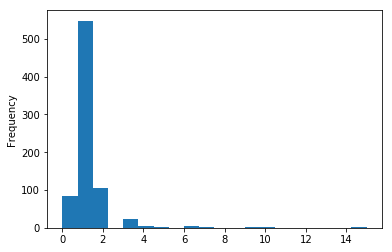

In [27]:
conf.n_funcoes.plot(kind='hist', bins=20)

In [28]:
# mantenho apenas um vínculo por servidor
ufc = ufc.drop_duplicates("nome")

In [29]:
ufc.nlargest(5, "remuneracao_basica_bruta", keep="first")[['remuneracao_basica_bruta', 'nome']]

,remuneracao_basica_bruta,nome
1.960,"44.341,22",LUIZ BOTELHO ALBUQUERQUE 1317416
6.401,"43.824,33",SEBASTIAO CARNEIRO DE ALMEIDA 2010301
2.018,"43.535,89",HENRY DE HOLANDA CAMPOS 1325177
4.663,"42.643,56",CARLOS AUGUSTO ALENCAR JUNIOR 1741074
1.911,"40.946,95",BOANERGES FREIRE DE AQUINO 1309902


In [30]:
ufc.uorg_lotacao.value_counts().describe()

count   519,00
mean     11,90
std      40,22
min       1,00
25%       1,00
50%       3,00
75%       9,00
max     735,00
Name: uorg_lotacao, dtype: float64

In [31]:
ufc.uorg_lotacao.value_counts().loc[lambda x: x < 2].shape

(158,)

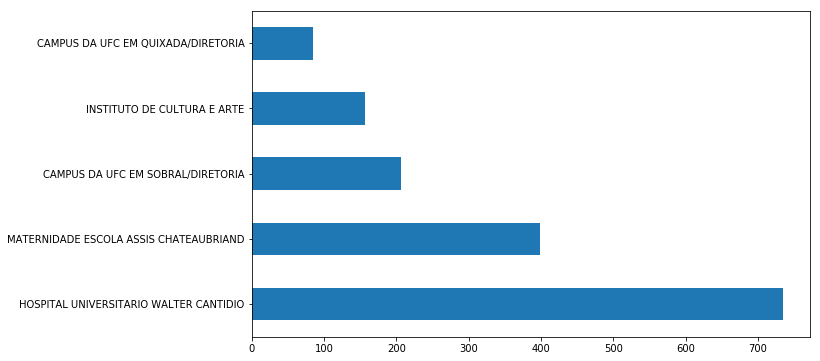

In [32]:
ufc.uorg_lotacao.value_counts().nlargest(5).plot(kind='barh', figsize=(10, 6))

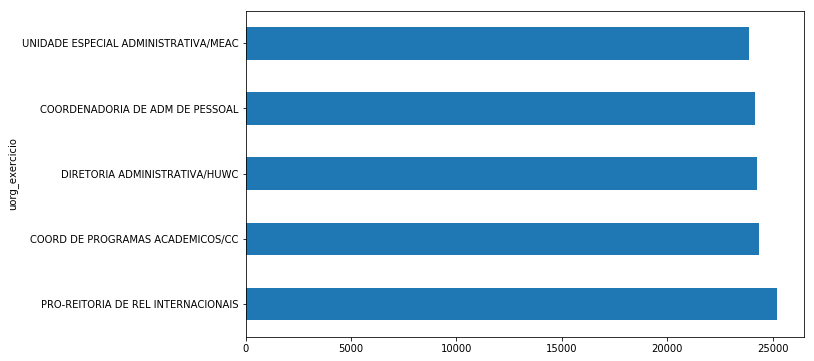

In [33]:
ufc.groupby("uorg_exercicio").remuneracao_basica_bruta.mean().nlargest(5).plot(kind='barh', figsize=(10, 6))

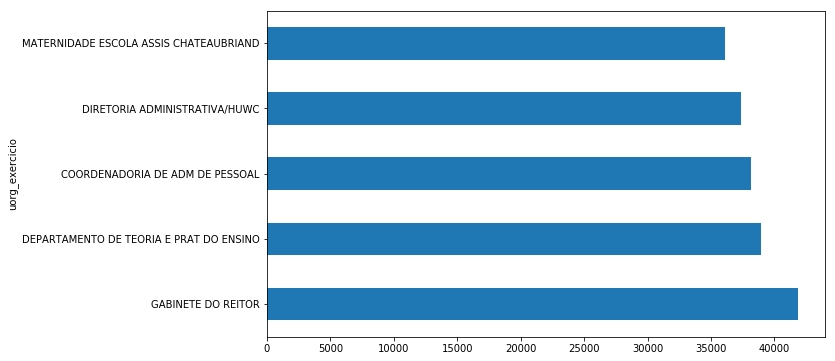

In [34]:
ufc.groupby("uorg_exercicio").remuneracao_basica_bruta.apply(lambda g: g.max() - g.min()).nlargest(5).plot(kind='barh', figsize=(10, 6))

In [35]:
ufc[ufc.uorg_exercicio == 'GABINETE DO REITOR']\
.loc[lambda x: [x.remuneracao_basica_bruta.argmax(), x.remuneracao_basica_bruta.argmin()]]

,cargo,funcao,uorg_lotacao,uorg_exercicio,jornada,remuneracao_basica_bruta,remuneracao_pos_deducao,nome
6.401,PROFESSOR DO MAGISTERIO SUPERIOR,NaN,NaN,GABINETE DO REITOR,DEDICACAO EXCLUSIVA,"43.824,33","30.163,89",SEBASTIAO CARNEIRO DE ALMEIDA 2010301
7.299,LOCUTOR,NaN,GABINETE DO REITOR,GABINETE DO REITOR,40 HORAS SEMANAIS,"1.945,07","2.010,33",PEDRO VITOR GADELHA MENDES 2242956


In [48]:
ufc['nome_sem_id'] = ufc.nome.str.rsplit(' ', n=1).apply(lambda x: x[0])

In [50]:
df = pd.merge(ufc, fcpc, left_on = "nome_sem_id", right_on = "nome", how = "outer", indicator = True)

In [51]:
df._merge.value_counts()

right_only   112.109
both          14.572
left_only      4.914
Name: _merge, dtype: int64

In [52]:
fcpcufc = df[df._merge == "both"]

In [55]:
fcpcufc.groupby("nome_sem_id").valor.sum().nlargest(5)

nome_sem_id
JAVAM DE CASTRO MACHADO              802.283,12
LUIZ ROBERTO DE OLIVEIRA             665.245,29
FRANCISCO RODRIGO PORTO CAVALCANTI   606.908,99
ROSSANA MARIA DE CASTRO ANDRADE      594.043,50
HELANO DE SOUSA CASTRO               579.292,22
Name: valor, dtype: float64

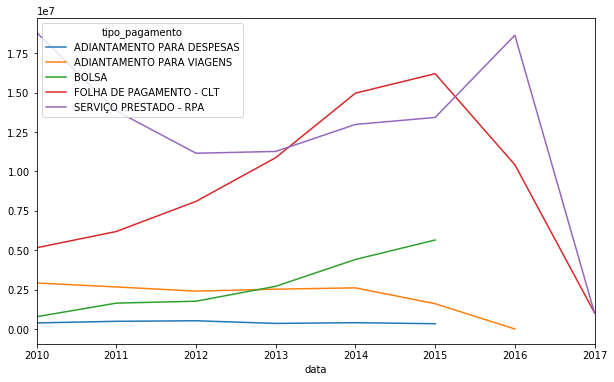

In [56]:
top_5_pagamentos = fcpc.tipo_pagamento.value_counts().nlargest(5)

fcpc[fcpc.tipo_pagamento.isin(top_5_pagamentos.index)].pivot_table("valor", fcpc.data.dt.year, "tipo_pagamento", aggfunc="sum")\
.plot(figsize = (10, 6))

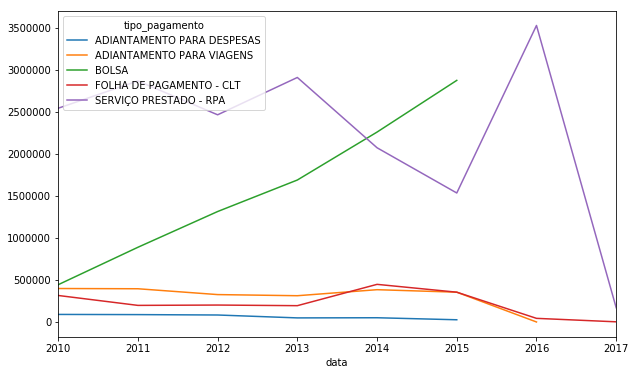

In [57]:
top_5_pagamentos = fcpcufc.tipo_pagamento.value_counts().nlargest(5)

fcpcufc[fcpcufc.tipo_pagamento.isin(top_5_pagamentos.index)].pivot_table("valor", fcpcufc.data.dt.year, "tipo_pagamento", aggfunc="sum")\
.plot(figsize = (10, 6))